In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Imports. Load data set, use Joseph's notebook for reference.

In [2]:
master = pd.ExcelFile("CONTE_TWIN_CT_SA_tlaplace_Master.xlsx") #File

In [3]:
master.sheet_names 

['ROIs',
 '1_2_CONTE_CT_tlaplace_dROI',
 '1_2_CONTE_SA_dROI',
 '1_2_CONTE_TotalCT_SA',
 '1_2_TWIN_CT_tlaplace_dROI',
 '1_2_TWIN_SA_dROI',
 '1_2_TWIN_TotalCT_SA',
 '4_6_CONTE_CT_tlaplace_dROI',
 '4_6_CONTE_SA_dROI',
 '4_6_CONTE_TotalCT_SA',
 '4_6_TWIN_CT_tlaplace_dROI',
 '4_6_TWIN_SA_dROI',
 '4_6_TWIN_TotalCT_SA']

In [4]:
ct1_2y = master.parse('1_2_CONTE_CT_tlaplace_dROI')
ct4_6y = master.parse('4_6_CONTE_CT_tlaplace_dROI')
#This will bring in the 1,2,4,6 yr CTs
#Now 1,2,4,6 yr SAs
sa1_2y = master.parse('1_2_CONTE_SA_dROI')
sa4_6y = master.parse('4_6_CONTE_SA_dROI')
#This will bring in the 1 and 2 year CTs.
ct1y = ct1_2y.loc[ct1_2y['ROI'].str.contains("1year"),:] #Separating 1 year
ct2y = ct1_2y.loc[ct1_2y['ROI'].str.contains("2year"),:] #Separating 2 year
ct4y = ct4_6y.loc[ct4_6y['ROI'].str.contains("4year"),:] #Separating 4 year
ct6y = ct4_6y.loc[ct4_6y['ROI'].str.contains("6year"),:] #Separating 6 year

sa1y = sa1_2y.loc[sa1_2y['ROI'].str.contains("1year"),:] #Separating 1 year
sa2y = sa1_2y.loc[sa1_2y['ROI'].str.contains("2year"),:] #Separating 2 year
sa4y = sa4_6y.loc[sa4_6y['ROI'].str.contains("4year"),:] #Separating 4 year
sa6y = sa4_6y.loc[sa4_6y['ROI'].str.contains("6year"),:] #Separating 6 year
print(sa2y.shape)
print(sa4y.shape)
#test = sa1_2y.loc[:,11101] #So convention for this is dataframe.loc[rows,columns]
#print(test)
#248x151 248 1 Year subjects. 151 Features including ROI which I have to remove.

(188, 151)
(162, 151)


In [5]:
ct1yFeatures = ct1y.loc[:, ct1y.columns] #This line sets my columns as x, so I don't mess with ct1y.
ct1yFeatures = ct1yFeatures.drop(['ROI'], axis=1) #Get rid of subject names to only have features now.
ct2yFeatures = ct2y.loc[:, ct2y.columns] 
ct2yFeatures = ct2yFeatures.drop(['ROI'], axis=1) 
ct4yFeatures = ct4y.loc[:, ct4y.columns] 
ct4yFeatures = ct4yFeatures.drop(['ROI'], axis=1) 
ct6yFeatures = ct6y.loc[:, ct6y.columns] 
ct6yFeatures = ct6yFeatures.drop(['ROI'], axis=1) 

sa1yFeatures = sa1y.loc[:, sa1y.columns] 
sa1yFeatures = sa1yFeatures.drop(['ROI'], axis=1)
sa2yFeatures = sa2y.loc[:, sa2y.columns] 
sa2yFeatures = sa2yFeatures.drop(['ROI'], axis=1) 
sa4yFeatures = sa4y.loc[:, sa4y.columns] 
sa4yFeatures = sa4yFeatures.drop(['ROI'], axis=1) 
sa6yFeatures = sa6y.loc[:, sa6y.columns] 
sa6yFeatures = sa6yFeatures.drop(['ROI'], axis=1)
print(sa4yFeatures.shape)
#print(ct1yFeatures)
# Standardizing the features
ct1 = StandardScaler().fit_transform(ct1yFeatures)
ct2 = StandardScaler().fit_transform(ct2yFeatures)
ct4 = StandardScaler().fit_transform(ct4yFeatures)
ct6 = StandardScaler().fit_transform(ct6yFeatures)
sa1 = StandardScaler().fit_transform(sa1yFeatures)
sa2 = StandardScaler().fit_transform(sa2yFeatures)
sa4 = StandardScaler().fit_transform(sa4yFeatures)
sa6 = StandardScaler().fit_transform(sa6yFeatures)
'''PCA is effected by scale so you need to scale the features in your data before applying PCA. 
Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 
which is a requirement for the optimal performance of many machine learning algorithms.'''
print(ct1.shape) #Should be 248 subjects x 150 features right?

(162, 150)
(248, 150)


In [6]:
pcaCT1Y = PCA(n_components=150) #150 Features
pcaCT1Y.fit(ct1)
pcaCT2Y = PCA(n_components=150) #150 Features
pcaCT2Y.fit(ct2)
pcaCT4Y = PCA(n_components=150) #150 Features
pcaCT4Y.fit(ct4)
pcaCT6Y = PCA(n_components=150) #150 Features
pcaCT6Y.fit(ct6)
pcaSA1Y = PCA(n_components=150) #150 Features
pcaSA1Y.fit(sa1)
pcaSA2Y = PCA(n_components=150) #150 Features
pcaSA2Y.fit(sa2)
pcaSA4Y = PCA(n_components=150) #150 Features
pcaSA4Y.fit(sa4)
pcaSA6Y = PCA(n_components=150) #150 Features
pcaSA6Y.fit(sa6)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
def runPCA(pca):
    sum = 0
    for i in range(0,51):
        sum += pca.explained_variance_ratio_[i]
        if (i==25):
            print('Sum of PCs explained variance ratio at 25 PCs ' + str(sum))
        if (i==50):
            print('Sum of PCs explained variance ratio at 50 PCs ' + str(sum))

    totalSingular = 0
    singular_values_squared = []
    individual_variance = []
    for i in range(0,150):
        totalSingular  = totalSingular + (pca.singular_values_[i]**2)
        singular_values_squared.append(pca.singular_values_[i]**2)

    print('Sum of singular variance ' + str(totalSingular))
    a = 0
    for i in range(0,150):
        individual_variance.append(singular_values_squared[i]/totalSingular)
        #print(individual_variance[i]) 
        a = a + individual_variance[i]
    print(a)
    
    for i in range(0,150):
        a = a - individual_variance[i]
        if(a <= 0.4):
            print("Intended reduced dimensions: " + str(i))
            break;
    
    #This is TV (Total Variance)
    #So now singular values squared is filled.



    #For the graphs by themselves
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    #plt.plot(individual_variance)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle('Explained Variance Ratio and Individual Variance')
    ax1.plot(np.cumsum(pca.explained_variance_ratio_))
    ax2.set(xlim=(0, 150), ylim=(0, 0.02))
    ax2.plot(individual_variance)


Sum of PCs explained variance ratio at 25 PCs 0.719320215351573
Sum of PCs explained variance ratio at 50 PCs 0.8587291318117513
Sum of singular variance 37200.000000000015
1.0
Intended reduced dimensions: 13
Sum of PCs explained variance ratio at 25 PCs 0.7308269132341118
Sum of PCs explained variance ratio at 50 PCs 0.8739717278334065
Sum of singular variance 28200.00000000001
1.0000000000000007
Intended reduced dimensions: 12
Sum of PCs explained variance ratio at 25 PCs 0.8384863911946363
Sum of PCs explained variance ratio at 50 PCs 0.9360940278535277
Sum of singular variance 24299.99999999999
1.0000000000000002
Intended reduced dimensions: 4
Sum of PCs explained variance ratio at 25 PCs 0.8100507059168914
Sum of PCs explained variance ratio at 50 PCs 0.9185160553627404
Sum of singular variance 25799.999999999956
1.0000000000000013
Intended reduced dimensions: 6


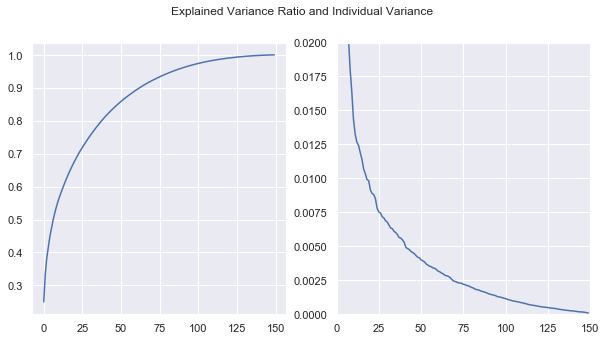

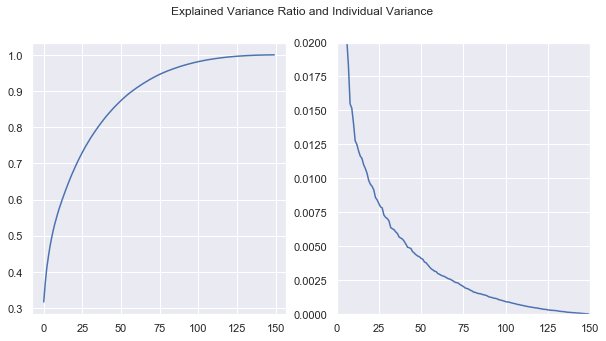

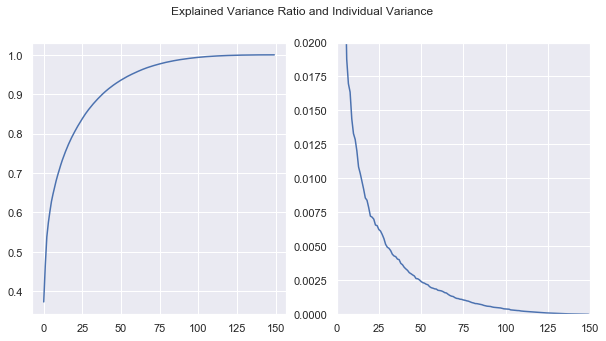

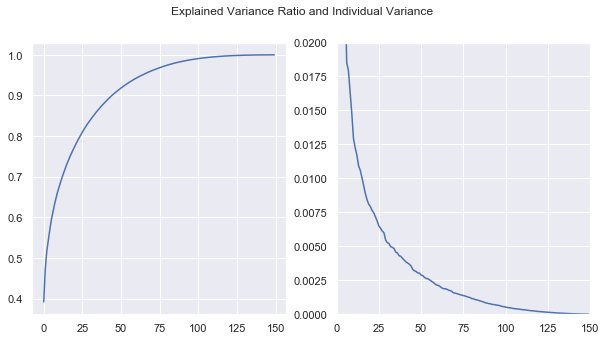

In [90]:
pca = pcaCT1Y
runPCA(pca)
pca = pcaCT2Y
runPCA(pca)
pca = pcaCT4Y
runPCA(pca)
pca = pcaCT6Y
runPCA(pca)

Sum of PCs explained variance ratio at 25 PCs 0.5916956818673522
Sum of PCs explained variance ratio at 50 PCs 0.7859582747751767
Sum of singular variance 37200.00000000001
1.0000000000000007
Intended reduced dimensions: 26
Sum of PCs explained variance ratio at 25 PCs 0.6088394659542372
Sum of PCs explained variance ratio at 50 PCs 0.808407924285891
Sum of singular variance 28199.99999999999
0.9999999999999993
Intended reduced dimensions: 25
Sum of PCs explained variance ratio at 25 PCs 0.6212662095691662
Sum of PCs explained variance ratio at 50 PCs 0.8245992088225031
Sum of singular variance 24300.000000000015
0.9999999999999993
Intended reduced dimensions: 24
Sum of PCs explained variance ratio at 25 PCs 0.6241385394946164
Sum of PCs explained variance ratio at 50 PCs 0.823432744795252
Sum of singular variance 25799.99999999998
1.0
Intended reduced dimensions: 23


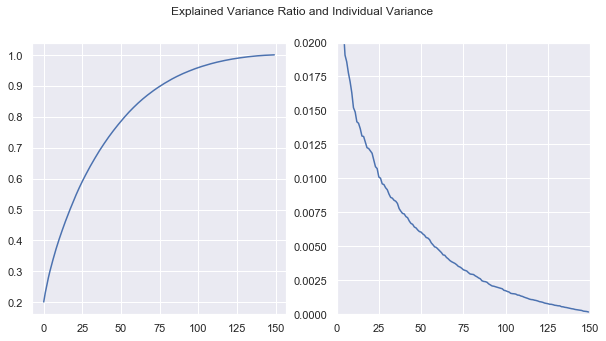

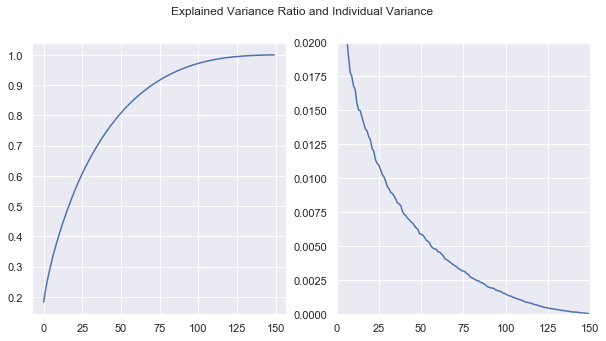

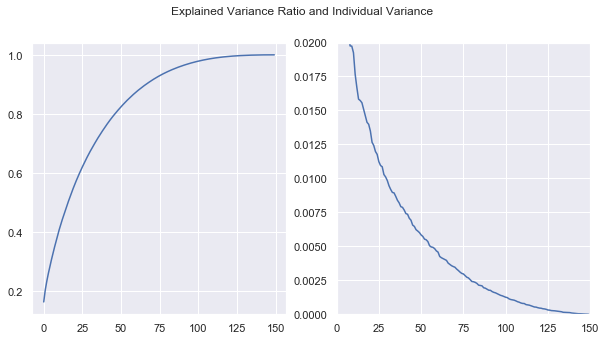

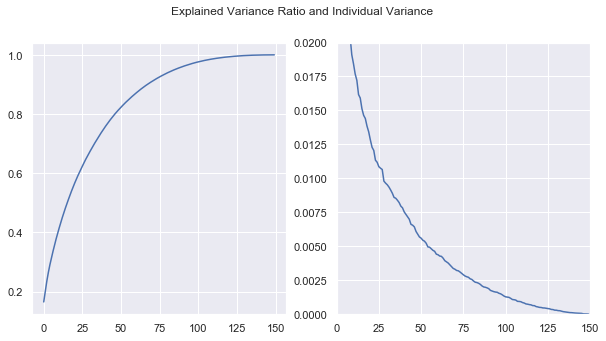

In [91]:
pca = pcaSA1Y
runPCA(pca)
pca = pcaSA2Y
runPCA(pca)
pca = pcaSA4Y
runPCA(pca)
pca = pcaSA6Y
runPCA(pca)